## Importing libraries and the data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [30]:
df = pd.read_excel('data.xlsx')
airfoil = pd.read_csv("NACA66015.csv")
print(df.head())
airfoil.y = airfoil.y - 0.2
print(airfoil.head())

   AOA  P1_AOA  P2_AOA  P3_AOA  P4_AOA  P5_AOA  P6_AOA  P7_AOA  P8_AOA  \
0 -4.0     7.4    10.5    10.2     9.8     9.5     9.4     9.3     9.2   
1 -2.0     7.0     9.6     9.5     9.4     9.2     9.1     9.1     9.0   
2  0.0     6.8     8.6     8.8     8.8     8.8     8.8     8.8     8.7   
3  2.0     6.9     7.9     8.2     8.3     8.5     8.6     8.7     8.7   
4  4.0     7.4     7.3     7.6     7.8     8.1     8.3     8.5     8.5   

   P9_AOA  ...  P11_RPM  P12_RPM  P13_RPM  P14_RPM  P15_RPM  P16_RPM  \
0     9.1  ...      6.8      6.8      6.7      6.6      6.5      6.5   
1     8.9  ...      7.1      7.0      7.0      7.0      6.9      6.7   
2     8.6  ...      7.5      7.4      7.4      7.3      7.3      6.9   
3     8.5  ...      8.4      8.2      8.0      8.0      7.8      7.2   
4     8.3  ...      9.2      9.0      8.7      8.5      8.4      7.5   

   P_TEST_RPM  P_SETTLING_RPM  Fixed_RPM  Fixed_AOA  
0         6.7             6.8      700.0        5.5  
1         6.6 

In [31]:
x_ports_up = [0, 2, 4, 6, 13, 23, 42, 60, 79, 101]
x_ports_down = [6, 12, 23, 41, 59, 79]
airfoil_thickness_up = interp1d(airfoil.x[:21]*101, airfoil.y[:21]*101)
airfoil_thickness_down = interp1d(airfoil.x[21:]*101, airfoil.y[21:]*101)
y_ports_up = airfoil_thickness_up(x_ports_up)
y_ports_down = airfoil_thickness_down(x_ports_down)

### Plotting the airfoil and the pressure ports

(-50.0, 50.0)

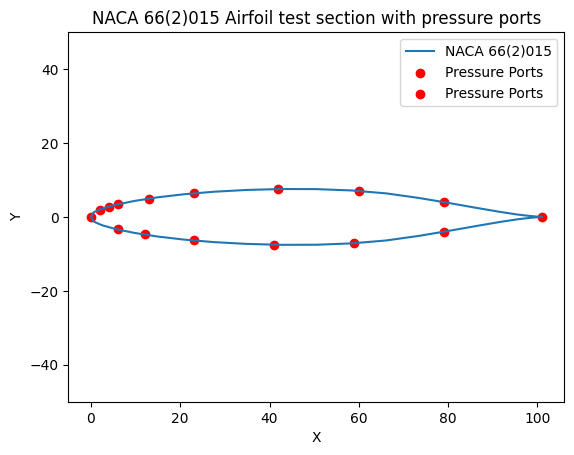

In [33]:
plt.plot(airfoil.x*101, airfoil.y*101, label = 'NACA 66(2)015')
plt.scatter(x_ports_up, y_ports_up, color ='r', label='Pressure Ports')
plt.scatter(x_ports_down, y_ports_down, color ='r', label='Pressure Ports')
plt.legend()
plt.title("NACA 66(2)015 Airfoil test section with pressure ports")
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-50,50])

## Computing the Cl and Cd

### For varying Angle of Attacks at 700 RPM

In [47]:
CR = 1/6 #(A_test / A_settling)
R = 287
T = 30.5 + 273.15 #Kelvins
P = 101325 #Pascals
rho = P/T/R
rho_eth = 780.2
g = 9.81
theta = np.radians(48)
a = np.sqrt(1.4*R*T)
V_test = np.mean(np.sqrt(2*(df.P_TEST_AOA - df.P_SETTLING_AOA)/rho/(CR-1))) # m/s
M_test = V_test/a #Mach Number